In [1]:
import os
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 2.4.1
Eager execution: True


# Dataset

In [4]:
# The Iris classification problem
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(
  fname='iris_training.csv',
  origin=train_dataset_url,
  cache_dir='.',
  cache_subdir=''
)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

8192/2194 [================================================================================================================] - 0s 0us/step
Local copy of the dataset file: ./iris_training.csv


In [5]:
!head -n5 {train_dataset_fp}

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


In [6]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [7]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

In [8]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
  train_dataset_fp,
  batch_size,
  column_names=column_names,
  label_name=label_name,
  num_epochs=1
)

In [9]:
features, labels = next(iter(train_dataset))

print(features)

OrderedDict([('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([4.4, 6.9, 6.8, 5.8, 6.2, 6.1, 4.9, 5.5, 5.5, 5.7, 5.4, 5.1, 4.9,
       5.7, 5.1, 5.4, 5.2, 4.6, 7.7, 7.9, 5.8, 6.6, 4.9, 6. , 5.1, 6.5,
       6.4, 6.7, 6.7, 7.2, 7.2, 6.5], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([3.2, 3.1, 3. , 2.8, 2.2, 2.8, 3.1, 3.5, 2.4, 2.9, 3.7, 2.5, 3.1,
       2.8, 3.8, 3.9, 3.5, 3.1, 2.6, 3.8, 4. , 3. , 2.4, 2.7, 3.8, 3. ,
       3.2, 3. , 3.1, 3.6, 3.2, 3. ], dtype=float32)>), ('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([1.3, 4.9, 5.5, 5.1, 4.5, 4.7, 1.5, 1.3, 3.7, 4.2, 1.5, 3. , 1.5,
       4.1, 1.9, 1.3, 1.5, 1.5, 6.9, 6.4, 1.2, 4.4, 3.3, 5.1, 1.5, 5.2,
       5.3, 5.2, 5.6, 6.1, 6. , 5.5], dtype=float32)>), ('petal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([0.2, 1.5, 2.1, 2.4, 1.5, 1.2, 0.1, 0.2, 1. , 1.3, 0.2, 1.1, 0.1,
       1.3, 0.4, 0.4, 0.2, 0.2, 2.3, 2. , 0.2, 1.4, 1. , 1.6,

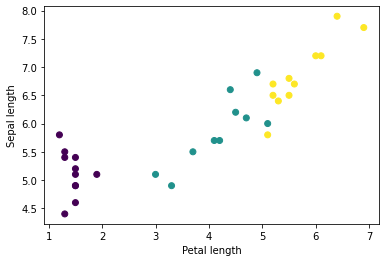

In [10]:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

In [11]:
def pack_features_vector(features, labels):
  features = tf.stack(list(features.values()), axis=1)
  return features, labels

In [12]:
train_dataset = train_dataset.map(pack_features_vector)

In [13]:
features, labels = next(iter(train_dataset))

print(features[:5])
print(len(features))

tf.Tensor(
[[5.  3.3 1.4 0.2]
 [6.4 2.8 5.6 2.1]
 [5.  3.5 1.3 0.3]
 [4.7 3.2 1.3 0.2]
 [4.8 3.  1.4 0.1]], shape=(5, 4), dtype=float32)
32


# Model

In [14]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(3)
])

In [15]:
predictions = model.predict(features)
predictions[:5]

array([[-1.8382711 , -0.43227234,  0.71146876],
       [-1.5254368 ,  0.42139152, -0.28067064],
       [-1.8785063 , -0.42147693,  0.7571022 ],
       [-1.7519301 , -0.39416012,  0.68895364],
       [-1.7361709 , -0.43284854,  0.65170354]], dtype=float32)

In [16]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.05591787, 0.22812249, 0.71595967],
       [0.08711901, 0.61039317, 0.30248788],
       [0.05196159, 0.22308081, 0.72495764],
       [0.06108475, 0.23746781, 0.70144737],
       [0.06421854, 0.23642103, 0.69936043]], dtype=float32)>

In [17]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Prediction: [2 1 2 2 2 1 2 2 1 1 1 1 2 2 1 1 1 2 2 1 2 1 2 1 1 1 1 1 1 1 2 2]
    Labels: [0 2 0 0 0 1 0 0 1 2 2 2 0 0 2 1 1 0 0 2 1 2 0 2 1 2 1 2 2 1 0 0]


# Train

In [18]:
def loss(model, x, y, training):
  y_ = model(x, training=training)
  return tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)(y_true=y, y_pred=y_)

In [19]:
l = loss(model, features, labels, training=False)
print("Loss test: {}".format(l))

Loss test: 1.782804012298584


In [20]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [21]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [22]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                       loss_value.numpy()))

Step: 0, Initial Loss: 1.782804012298584


In [23]:
optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                          loss(model, features, labels, training=True).numpy()))

Step: 1,         Loss: 1.6442241668701172


In [24]:
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 32
  for x, y in train_dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg.update_state(loss_value)
    epoch_accuracy.update_state(y, model(x, training=True))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                    epoch_loss_avg.result(),
                                    epoch_accuracy.result()))

Epoch 000: Loss: 1.419, Accuracy: 30.000%
Epoch 050: Loss: 0.345, Accuracy: 95.833%
Epoch 100: Loss: 0.222, Accuracy: 96.667%
Epoch 150: Loss: 0.155, Accuracy: 96.667%
Epoch 200: Loss: 0.120, Accuracy: 98.333%


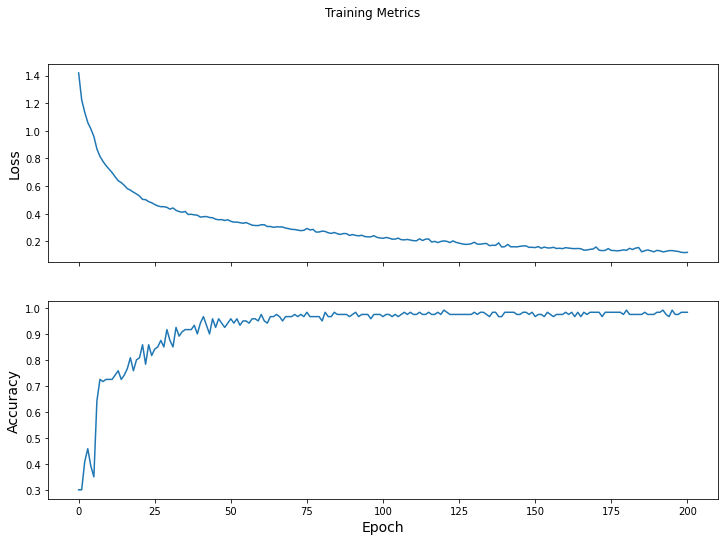

In [25]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

# Test

In [26]:
# The Iris classification problem
test_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_dataset_fp = tf.keras.utils.get_file(
  fname='iris_test.csv',
  origin=train_dataset_url,
  cache_dir='.',
  cache_subdir=''
)

print("Local copy of the dataset file: {}".format(test_dataset_fp))

8192/2194 [================================================================================================================] - 0s 0us/step
Local copy of the dataset file: ./iris_test.csv


In [27]:
test_dataset = tf.data.experimental.make_csv_dataset(
  test_dataset_fp,
  batch_size=batch_size,
  column_names=column_names,
  label_name=label_name,
  num_epochs=1,
  shuffle=False
)

test_dataset = test_dataset.map(pack_features_vector)

In [28]:
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
  logits=model(x, training=False)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 97.500%
